<a href="https://colab.research.google.com/github/padmacharan-123/APPLIED-AI-REC-1/blob/main/AAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

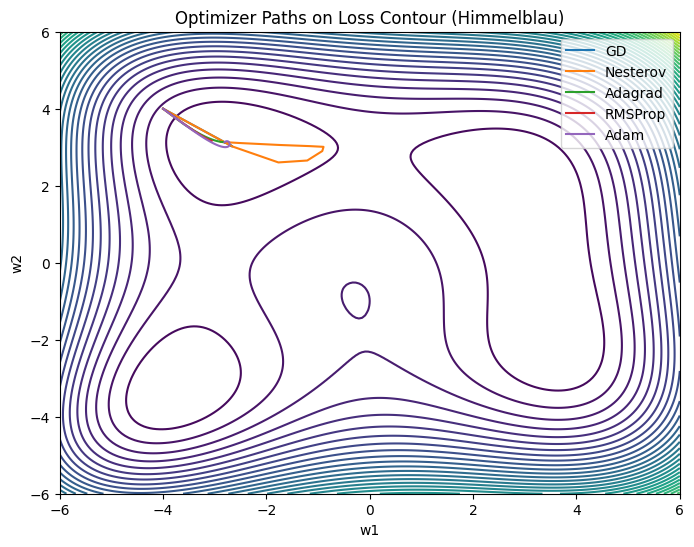

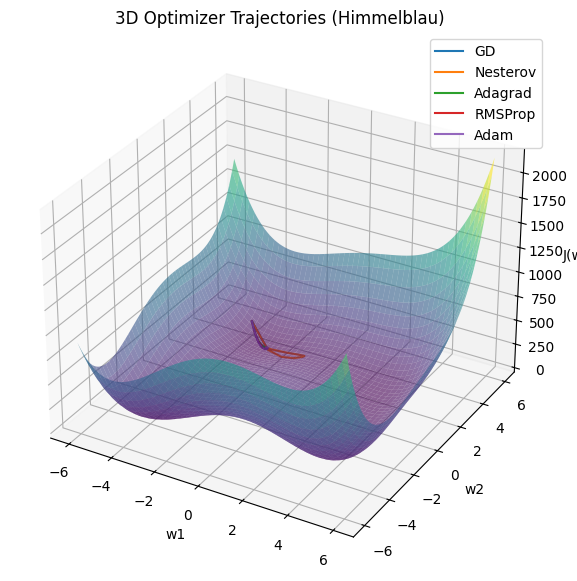

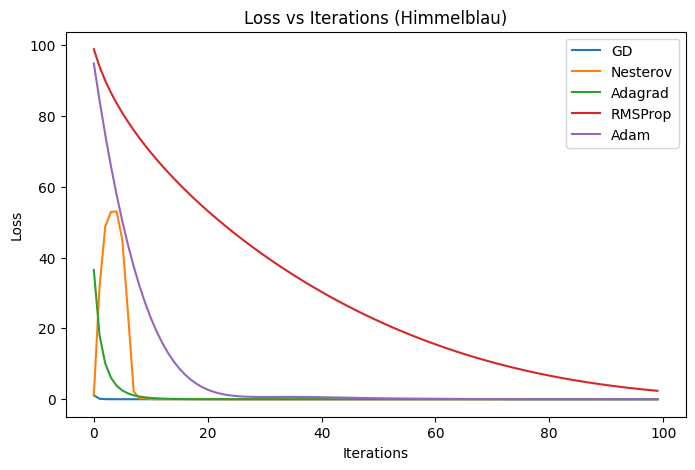

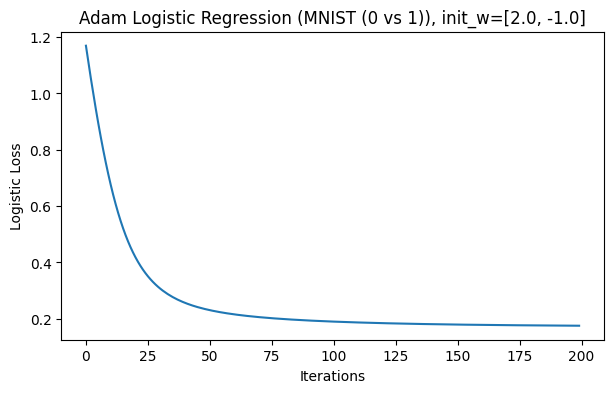

Dataset: MNIST (0 vs 1)
Final weights: [-0.8184295  -3.60402947]
Training accuracy (0 vs 1): 0.9313857086458744


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import StandardScaler

def J(w):
    w1, w2 = w
    return (w1**2 + w2 - 11)**2 + (w1 + w2**2 - 7)**2

def grad_J(w):
    w1, w2 = w
    dw1 = 4*w1*(w1**2 + w2 - 11) + 2*(w1 + w2**2 - 7)
    dw2 = 2*(w1**2 + w2 - 11) + 4*w2*(w1 + w2**2 - 7)
    return np.array([dw1, dw2], dtype=np.float64)

def GD(init, lr=0.01, steps=100):
    w = init.astype(np.float64).copy()
    path = [w.copy()]
    loss = []
    for _ in range(steps):
        w -= lr * grad_J(w)
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss

def Nesterov(init, lr=0.01, gamma=0.9, steps=100):
    w = init.astype(np.float64).copy()
    v = np.zeros_like(w)
    path = [w.copy()]
    loss = []
    for _ in range(steps):
        lookahead = w - gamma * v
        g = grad_J(lookahead)
        v = gamma * v + lr * g
        w -= v
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss

def Adagrad(init, lr=0.4, steps=100):
    w = init.astype(np.float64).copy()
    G = np.zeros_like(w)
    eps = 1e-8
    path = [w.copy()]
    loss = []
    for _ in range(steps):
        g = grad_J(w)
        G += g**2
        w -= lr * g / (np.sqrt(G) + eps)
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss

def RMSProp(init, lr=0.01, beta=0.9, steps=100):
    w = init.astype(np.float64).copy()
    Eg = np.zeros_like(w)
    eps = 1e-8
    path = [w.copy()]
    loss = []
    for _ in range(steps):
        g = grad_J(w)
        Eg = beta * Eg + (1 - beta) * (g**2)
        w -= lr * g / (np.sqrt(Eg) + eps)
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss

def Adam(init, lr=0.05, steps=100):
    w = init.astype(np.float64).copy()
    m = np.zeros_like(w)
    v = np.zeros_like(w)
    b1, b2 = 0.9, 0.999
    eps = 1e-8
    path = [w.copy()]
    loss = []
    for t in range(1, steps + 1):
        g = grad_J(w)
        m = b1*m + (1-b1)*g
        v = b2*v + (1-b2)*(g**2)
        mhat = m / (1 - b1**t)
        vhat = v / (1 - b2**t)
        w -= lr * mhat / (np.sqrt(vhat) + eps)
        path.append(w.copy())
        loss.append(J(w))
    return np.array(path), loss

init = np.array([-4.0, 4.0], dtype=np.float64)

optimizers = {
    "GD": GD,
    "Nesterov": Nesterov,
    "Adagrad": Adagrad,
    "RMSProp": RMSProp,
    "Adam": Adam
}

paths, losses = {}, {}
for name, opt in optimizers.items():
    paths[name], losses[name] = opt(init)

x = np.linspace(-6, 6, 200)
y = np.linspace(-6, 6, 200)
Xg, Yg = np.meshgrid(x, y)
Z = J([Xg, Yg])

plt.figure(figsize=(8, 6))
plt.contour(Xg, Yg, Z, 40)
for name, p in paths.items():
    plt.plot(p[:, 0], p[:, 1], label=name)
plt.legend()
plt.title("Optimizer Paths on Loss Contour (Himmelblau)")
plt.xlabel("w1")
plt.ylabel("w2")
plt.show()

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xg, Yg, Z, cmap=cm.viridis, alpha=0.6)
for name, p in paths.items():
    zline = [J(w) for w in p]
    ax.plot(p[:, 0], p[:, 1], zline, label=name)
ax.set_title("3D Optimizer Trajectories (Himmelblau)")
ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("J(w)")
ax.legend()
plt.show()

plt.figure(figsize=(8, 5))
for name, l in losses.items():
    plt.plot(l, label=name)
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations (Himmelblau)")
plt.show()


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss_lr(w, X_in, y_in):
    p = sigmoid(X_in.dot(w))
    return -np.mean(y_in*np.log(p+1e-8) + (1-y_in)*np.log(1-p+1e-8))

def grad_lr(w, X_in, y_in):
    p = sigmoid(X_in.dot(w))
    return X_in.T.dot(p - y_in) / len(y_in)

def train_adam_lr(X_in, y_in, init_w=None, steps=200, lr=0.05):
    w = np.zeros(X_in.shape[1], dtype=np.float64) if init_w is None else np.array(init_w, dtype=np.float64)

    m = np.zeros_like(w)
    v = np.zeros_like(w)
    b1, b2 = 0.9, 0.999
    eps = 1e-8

    path = [w.copy()]
    losses = []

    for t in range(1, steps + 1):
        g = grad_lr(w, X_in, y_in)
        m = b1*m + (1-b1)*g
        v = b2*v + (1-b2)*(g**2)
        mhat = m / (1 - b1**t)
        vhat = v / (1 - b2**t)
        w -= lr * mhat / (np.sqrt(vhat) + eps)

        path.append(w.copy())
        losses.append(loss_lr(w, X_in, y_in))

    return np.array(path), losses



try:
    import tensorflow as tf

    (x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
    mask = (y_train == 0) | (y_train == 1)
    x = x_train[mask]
    y = y_train[mask].astype(np.float32)

    x = x.reshape(len(x), -1)
    f1 = x[:, :392].mean(axis=1)
    f2 = x[:, 392:].mean(axis=1)

    X = np.vstack((f1, f2)).T
    X = StandardScaler().fit_transform(X)

    dataset_name = "MNIST (0 vs 1)"

except Exception:
    from sklearn.datasets import load_digits
    digits = load_digits()
    Xraw = digits.data
    yraw = digits.target

    mask = (yraw == 0) | (yraw == 1)
    Xraw = Xraw[mask]
    y = yraw[mask].astype(np.float32)

    f1 = Xraw[:, :32].mean(axis=1)
    f2 = Xraw[:, 32:].mean(axis=1)

    X = np.vstack((f1, f2)).T
    X = StandardScaler().fit_transform(X)

    dataset_name = "sklearn Digits (0 vs 1) [TF not installed]"

init_w = [2.0, -1.0]
path_lr, loss_lr_vals = train_adam_lr(X, y, init_w=init_w, steps=200, lr=0.05)

plt.figure(figsize=(7, 4))
plt.plot(loss_lr_vals)
plt.xlabel("Iterations")
plt.ylabel("Logistic Loss")
plt.title(f"Adam Logistic Regression ({dataset_name}), init_w={init_w}")
plt.show()

final_w = path_lr[-1]
preds = (sigmoid(X.dot(final_w)) >= 0.5).astype(np.float32)
acc = (preds == y).mean()

print("Dataset:", dataset_name)
print("Final weights:", final_w)
print("Training accuracy (0 vs 1):", acc)